In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import ttest_ind

[02/04/23 17:26:32] WARNING  C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\plotly\expr ]8;id=526755;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=290884;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             ess\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated                
                             alias for `np.bool_`.  (Deprecated NumPy 1.24)                                        
                               np.bool8: (False, True),                                                            
                                                                                                                   

In [2]:
df = catalog.load("MICRODADOS_ENEM")
df_sample_all_years = catalog.load("sample_all_year_adjusted")

                    INFO     Loading data from 'MICRODADOS_ENEM' (ParquetDataSet)...            ]8;id=733924;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=637978;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[02/04/23 17:26:33] INFO     Loading data from 'sample_all_year_adjusted' (CSVDataSet)...       ]8;id=616134;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=690168;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_ST_CONCLUSAO,IN_TREINEIRO,CO_MUNICIPIO_ESC,TP_PRESENCA_MT,TP_ESCOLA,TP_ENSINO,NU_NOTA_MT
0,210053865474,2021,1,0,NaN,0.0,1,NaN,NaN
1,210052384164,2021,1,0,NaN,1.0,1,NaN,461.5
2,210052589243,2021,1,0,NaN,0.0,1,NaN,NaN
3,210052128335,2021,2,0,2304202.0,1.0,2,1.0,659.5
4,210051353021,2021,2,0,2311603.0,1.0,2,1.0,582.6


In [4]:
df_sample_all_years.head()

,mean,ano,tp_escola
0,502.9466,2021,publica
1,505.8428,2021,publica
2,504.4545,2021,publica
3,509.7118,2021,publica
4,507.5524,2021,publica


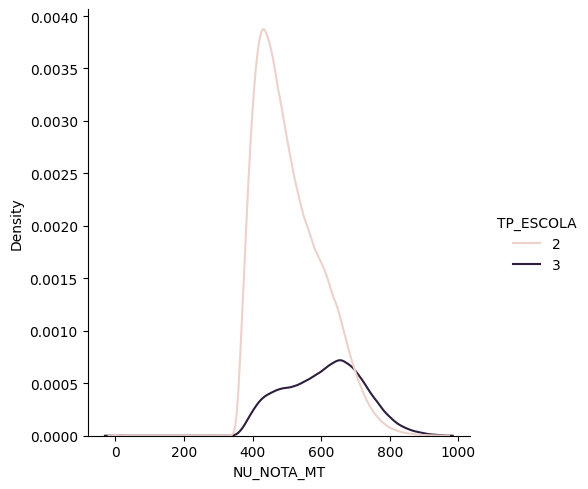

In [5]:
sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"), x="NU_NOTA_MT", hue="TP_ESCOLA", kind="kde");

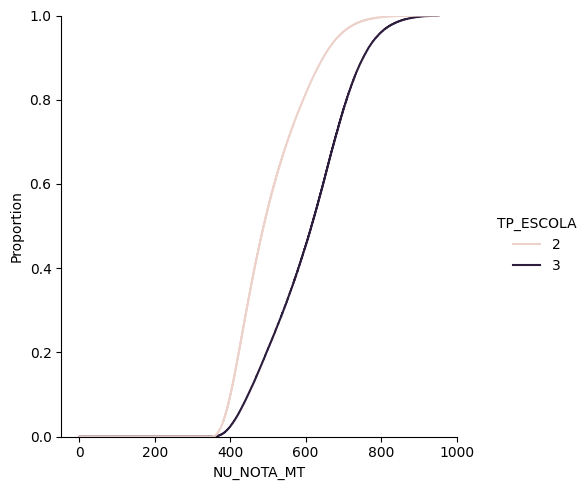

In [6]:
sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"), x="NU_NOTA_MT", hue="TP_ESCOLA", kind="ecdf");

<seaborn.axisgrid.FacetGrid object at 0x000002CA14EEB8B0>

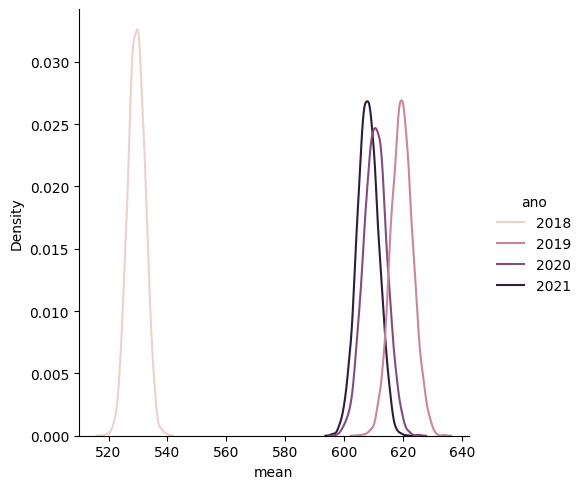

In [7]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'privado'"), x="mean", hue="ano", kind="kde")

<seaborn.axisgrid.FacetGrid object at 0x000002CA4822F940>

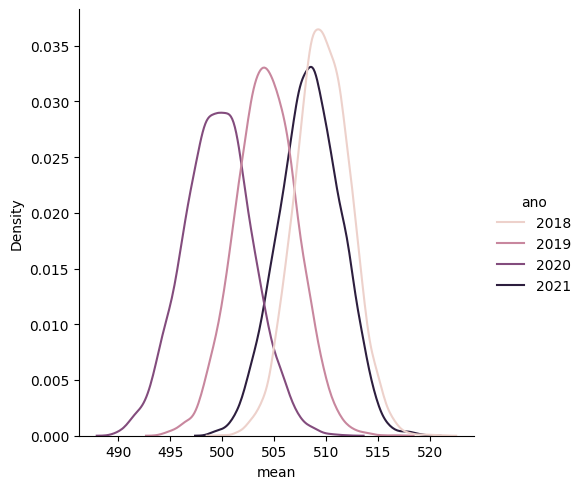

In [8]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'publica'"), x="mean", hue="ano", kind="kde")

<seaborn.axisgrid.FacetGrid object at 0x000002CA47E6DED0>

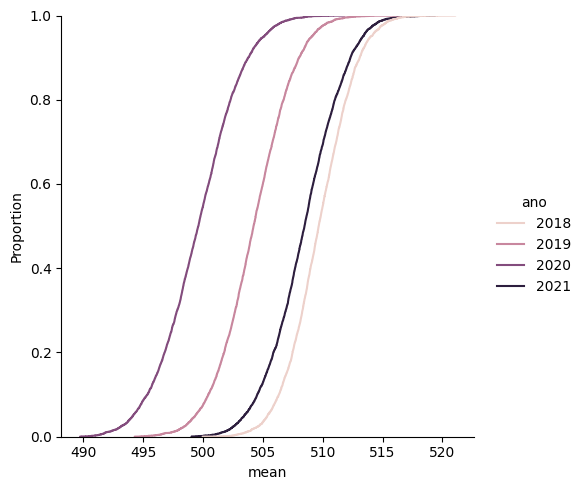

In [9]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'publica'"), x="mean", hue="ano", kind="ecdf")

<seaborn.axisgrid.FacetGrid object at 0x000002CA4806BEB0>

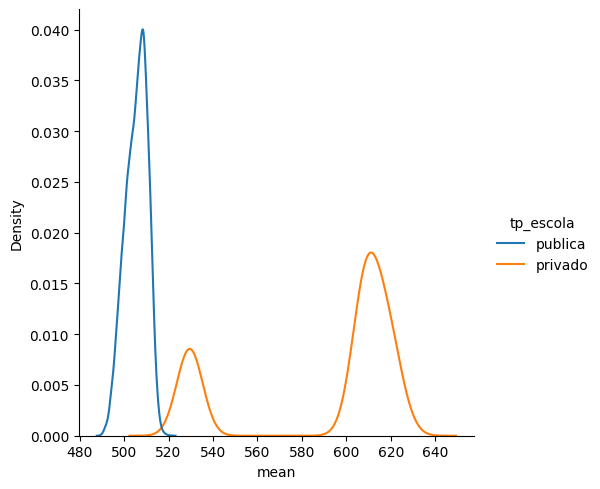

In [10]:
sns.displot(data=df_sample_all_years, x="mean", hue="tp_escola", kind="kde")

In [11]:
df_pivoted = pd.pivot(df_sample_all_years, columns=["ano", "tp_escola"], values="mean")

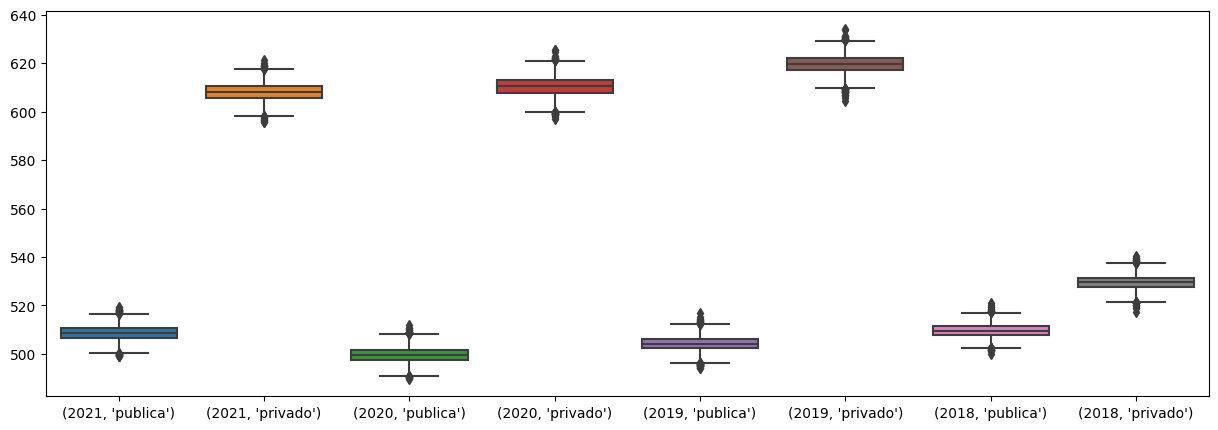

In [12]:
sns.boxplot(df_pivoted)

In [13]:
mean_sample_2021 = df_pivoted[(2021, "publica")].dropna().values
mean_sample_2019 = df_pivoted[(2019, "publica")].dropna().values
ttest_ind(mean_sample_2021, mean_sample_2019, equal_var=False, alternative='greater') 

Ttest_indResult(statistic=70.79932528358856, pvalue=0.0)

In [14]:
mean_sample_2021 = df_pivoted[(2021, "privado")].dropna().values
mean_sample_2019 = df_pivoted[(2019, "privado")].dropna().values
ttest_ind(mean_sample_2021, mean_sample_2019, equal_var=False, alternative='greater') 

Ttest_indResult(statistic=-158.53463998605508, pvalue=1.0)